In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv("titanic_train.csv")


In [3]:
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train['Age']=train['Age'].fillna(method='ffill')

<Axes: >

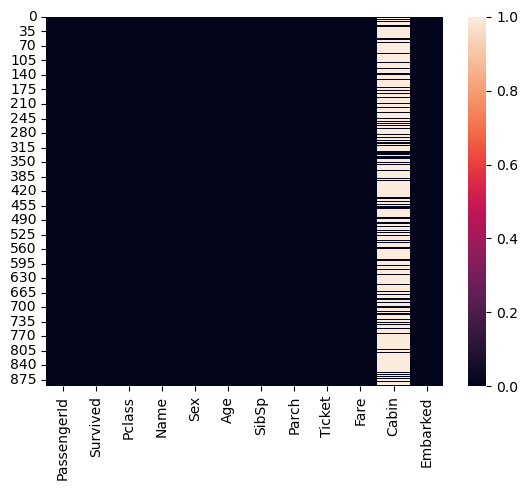

In [6]:
sns.heatmap(train.isnull())

In [7]:
train.drop('Cabin',axis = 1, inplace = True)

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
sex = pd.get_dummies(train['Sex'])

In [10]:
train.drop(['Sex','Embarked','Name','Ticket'],axis = 1, inplace = True)

In [11]:
sex

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train.drop('Survived', axis = 1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
888,889,3,19.0,1,2,23.4500
889,890,1,26.0,0,0,30.0000


In [14]:
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived',axis = 1),train['Survived'], test_size = 0.30,
                                                   random_state = 101)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

D:\anaconda 1\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
prediction = logmodel.predict(x_test)

In [18]:
prediction

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0], dtype=int64)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76       154
           1       0.73      0.40      0.52       114

    accuracy                           0.68       268
   macro avg       0.70      0.65      0.64       268
weighted avg       0.69      0.68      0.66       268



In [21]:
print(confusion_matrix(y_test,prediction))

[[137  17]
 [ 68  46]]


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dtree = DecisionTreeClassifier()

In [24]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
predict_tree = dtree.predict(x_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(confusion_matrix(y_test,prediction))

[[137  17]
 [ 68  46]]


In [28]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76       154
           1       0.73      0.40      0.52       114

    accuracy                           0.68       268
   macro avg       0.70      0.65      0.64       268
weighted avg       0.69      0.68      0.66       268



In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
rfc_pred = rfc.predict(x_test)

In [31]:
print(confusion_matrix(y_test,rfc_pred))

[[120  34]
 [ 53  61]]


In [32]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73       154
           1       0.64      0.54      0.58       114

    accuracy                           0.68       268
   macro avg       0.67      0.66      0.66       268
weighted avg       0.67      0.68      0.67       268



In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors=1)

In [35]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [36]:
pred = knn.predict(x_test)

In [37]:
pred

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1], dtype=int64)

In [38]:
from sklearn.metrics import classification_report.confusion_matrix

SyntaxError: invalid syntax (1864776412.py, line 1)

In [ ]:
print('WITH K=6')
print('\n')


In [ ]:
print(confusion_matrix(y_test,pred))

In [ ]:
nn = KNeighborsClassifier(n_neighbors=6)
nn.fit(x_train,y_train)
pred = nn.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,pred))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()


In [ ]:
scaler.fit(train.drop('Survived',axis=1))

In [ ]:
scaled_features = scaler.transform(train.drop('Survived',axis=1))

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns = ['PassengerId','Pclass','age','sipsb','parch','fair'])

In [ ]:
df_feat.head()

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
predict_svc = model.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,predict_svc))

In [ ]:
data = sns.load_dataset("iris")

In [ ]:
data

In [ ]:
data.head()

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
x = data.drop(['species'],axis = 1)
y = data['species']

In [ ]:
x

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [ ]:
x_test

In [ ]:
y_test

In [ ]:
logomodel = LogisticRegression()
logomodel.fit(x_train,y_train)

In [ ]:
prediction = logomodel.predict(x_test)

In [ ]:
print(classification_report(y_test,prediction))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
tree = DecisionTreeClassifier()

In [40]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
predict_tree = tree.predict(x_test)

In [42]:
predict_tree



array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1], dtype=int64)

In [43]:
print(classification_report(y_test,predict_tree))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69       154
           1       0.58      0.56      0.57       114

    accuracy                           0.64       268
   macro avg       0.63      0.63      0.63       268
weighted avg       0.64      0.64      0.64       268



In [44]:
accuracy_score(y_test,predict_tree)

NameError: name 'accuracy_score' is not defined

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predict_tree))

In [ ]:
print(classification_report(y_test,predict_tree))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
zim = RandomForestClassifier(n_estimators = 100)
zim.fit(x_train,y_train)

In [ ]:
zim_pred = zim.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,zim_pred))

In [ ]:
print(classification_report(y_test,zim_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
yan = KNeighborsClassifier(n_neighbors=1)

In [ ]:
yan.fit(x_train,y_train)

In [ ]:
predi = yan.predict(x_train) 

In [ ]:
predi

In [ ]:
from sklearn.metrics import classification_report.confusion_matrix

In [ ]:
print('WITH K=5')
print('\n')

In [ ]:
nn = KNeighborsClassifier(n_neighbors=6)
nn.fit(x_train,y_train)
predi = nn.predict(x_test)

In [ ]:
predi

In [ ]:
print(confusion_matrix(y_test,predi))

In [ ]:
print(classification_report(y_test,predi))

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scale = StandardScaler()


In [47]:
scale.fit(data.drop('species',axis=1))

NameError: name 'data' is not defined

In [48]:
scaled_features = scale.transform(data.drop('species',axis=1))

NameError: name 'data' is not defined

In [49]:
df_feat = pd.DataFrame(scaled_features,columns = ['sepal_length','sepal_width','petal_length','petal_width'])

NameError: name 'scaled_features' is not defined

In [50]:
df_feat.head()

NameError: name 'df_feat' is not defined

# k-MEANS CLUSTERING

In [51]:
from sklearn.cluster import KMeans

In [52]:
from sklearn.datasets import make_blobs

In [53]:
data = make_blobs(n_samples = 200, n_features = 2, centers = 4, cluster_std = 1.8, random_state = 101)

In [54]:
data

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

plt.scatter(data[0][:,0],data[0][:,1],c = data[1], cmap = 'rainbow')

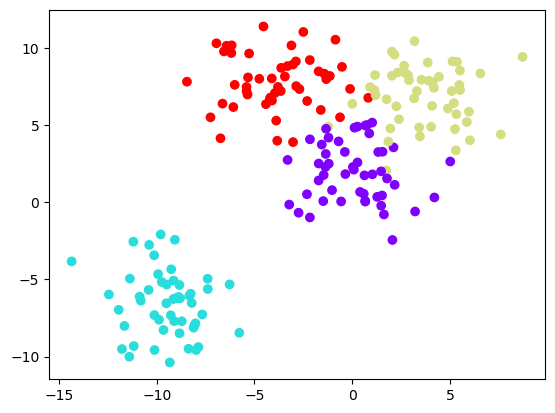

In [55]:
plt.scatter(data[0][:,0],data[0][:,1],c = data[1], cmap = 'rainbow')

In [56]:
kmeans = KMeans(n_clusters = 4)

In [57]:
kmeans.fit(data[0])

D:\anaconda 1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda 1\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [58]:
kmeans.cluster_centers_

array([[-4.13591321,  7.95389851],
       [-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [ 3.71749226,  7.01388735]])

In [59]:
kmeans.labels_

array([0, 3, 2, 3, 3, 1, 3, 2, 3, 2, 0, 2, 3, 3, 0, 2, 3, 2, 1, 0, 1, 2,
       2, 1, 0, 1, 1, 2, 3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0,
       2, 3, 0, 2, 1, 2, 2, 0, 3, 2, 1, 0, 2, 2, 0, 3, 1, 3, 1, 0, 3, 2,
       1, 3, 3, 1, 3, 2, 1, 2, 1, 3, 3, 2, 0, 2, 2, 1, 3, 1, 2, 2, 2, 0,
       2, 1, 1, 1, 1, 2, 2, 1, 3, 0, 1, 3, 2, 1, 2, 2, 3, 2, 1, 3, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 0, 3, 0, 2, 0, 2, 0, 2, 3, 0, 2, 1, 0, 0, 0,
       2, 1, 1, 0, 3, 0, 3, 2, 1, 3, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0, 2, 3,
       2, 0, 3, 3, 3, 2, 3, 2, 2, 0, 1, 0, 2, 3, 0, 2, 3, 2, 0, 3, 2, 0,
       3, 3, 1, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 3, 3, 0, 1, 2, 3, 3,
       1, 2])

# plt.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap = 'rainbow')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker ='>', color = 'green' )

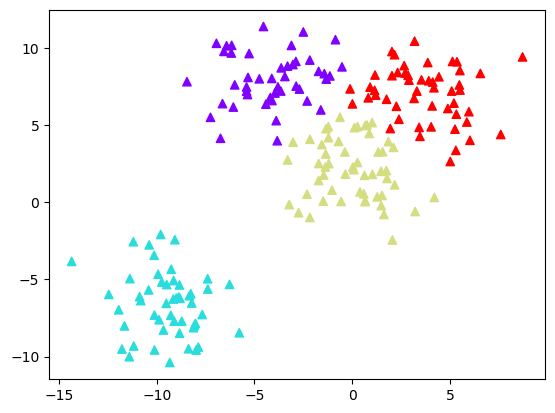

In [66]:
plt.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,marker="^",cmap = 'rainbow')

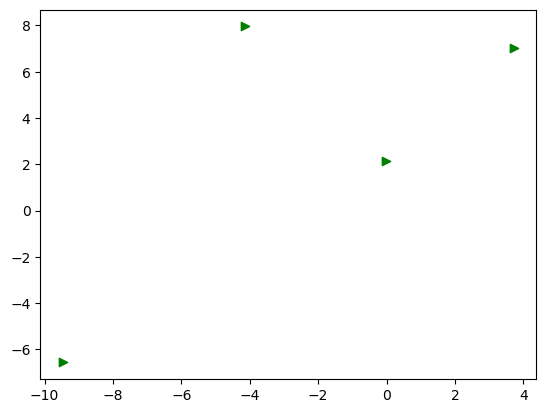

In [69]:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker ='>', color = 'green' )

In [75]:
data = pd.read_csv("College_Data")


In [79]:
from sklearn.datasets import load_iris

In [84]:
x, y = load_iris(return_X_y = True)

In [87]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [136]:
sse = []
for k in range(1,11):
    km = KMeans(n_clusters = k, init = 'k-means++', max_iter=300, n_init=10, random_state=2)
    km.fit(x)
    sse.append(km.inertia_)

D:\anaconda 1\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda 1\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda 1\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda 1\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

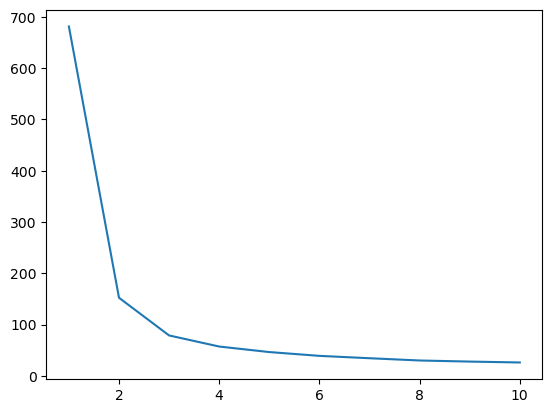

In [133]:
g = sns.lineplot(x=range(1,11),y=sse)

kmeans = KMeans(n_clusters = 3,random_state = 2)
kmeans.fit(x)

kmeans.cluster_centers_
pred = kmeans.fit_predict(x)

In [105]:
kmeans.cluster_centers_








array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [106]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

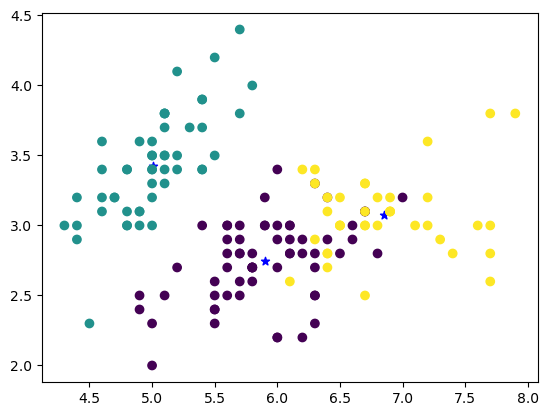

In [124]:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="*",color="blue")

plt.scatter(x[:,0],x[:,1],c=kmeans.labels_)

Text(0.5, 1.0, 'petal length VS petal width')

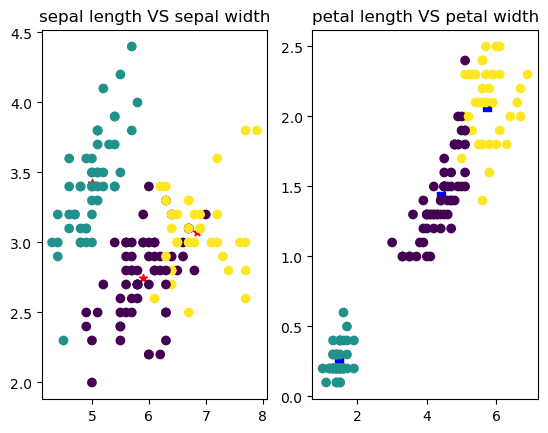

In [129]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker = "*", color = "red")
ax1.scatter(x[:,0],x[:,1],c=kmeans.labels_)
ax1.set_title('sepal length VS sepal width')

ax2.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],marker = "s", color = "blue")
ax2.scatter(x[:,2],x[:,3],c=kmeans.labels_)
ax2.set_title('petal length VS petal width')



In [130]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [131]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [139]:
kmeans.inertia_

78.851441426146

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [10]:
df = pd.DataFrame(cancer['data'],columns = cancer['feature_names'])

In [11]:
df.head()                            

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# PCA Visualization 


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [15]:
scaled_data = scaler.transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [16]:
x_pca = pca.transform(scaled_data)

NameError: name 'pca' is not defined